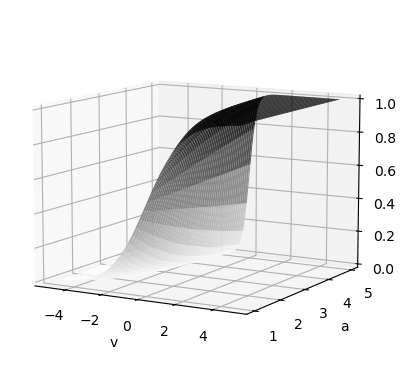

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from drift_diffusion.model import pdf, mdf

accuracy = lambda a, v: 1 / (1 + np.exp(-a * v))

v = np.linspace(-5, 5, 100)
a_s = np.linspace(1, 5, 100)
V, A = np.meshgrid(v, a_s)

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
ax.plot_surface(V, A, accuracy(A, V), cmap="binary")

ax.set_xlabel("v")
ax.set_ylabel("a")
ax.set_zlabel("Accuracy")
ax.view_init(elev=10)

Text(0, 0.5, '$P_+$')

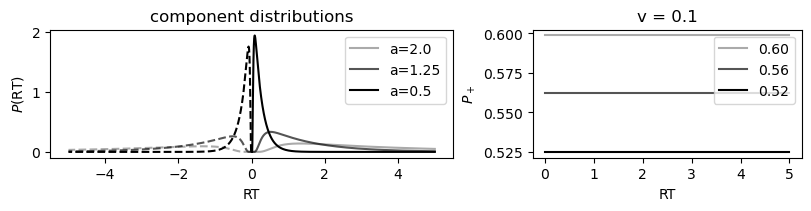

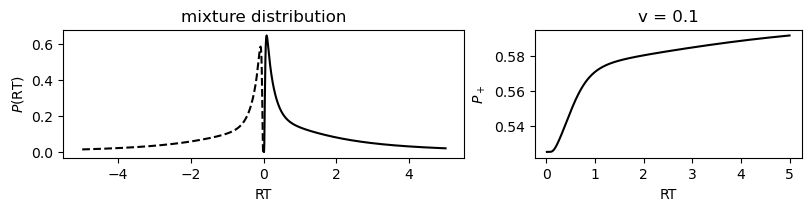

In [2]:
# parameter setting
n_samples = 1000
a_s, t0, v, z = np.array([2, 1.25, 0.5]), 0, 0.1, 0
rt = np.linspace(0.01, 5, n_samples)

# plot component densities + accuracies
fig, axs = plt.subplots(ncols=2, figsize=(8, 2), layout="constrained", width_ratios=[3, 2])

for idx, a in enumerate(a_s):
    alpha = (idx + 1) / len(a_s)
    pdf_corr = pdf(rt, a, t0, v, z)
    pdf_err = pdf(-rt, a, t0, v, z)
    acc = pdf_corr / (pdf_err + pdf_corr)

    # PDF
    axs[0].plot(rt, pdf_corr, color="k", alpha=alpha, label=f"a={a}")
    axs[0].plot(-rt, pdf_err, color="k", alpha=alpha, linestyle="--")

    # RT vs ACC
    axs[1].plot(rt, acc, color="k", alpha=alpha, label=f"{acc.mean():.2f}")

axs[0].set_title("component distributions")
axs[0].set_xlabel("RT")
axs[0].set_ylabel(r"$P$(RT)")
axs[0].legend()

axs[1].set_title(f"v = {v}")
axs[1].set_xlabel("RT")
axs[1].set_ylabel(r"$P_+$")
axs[1].legend()

# plot mixture density + accuracy
fig, axs = plt.subplots(ncols=2, figsize=(8, 2), layout="constrained", width_ratios=[3, 2])

mdfs_corr = mdf(rt, a_s, t0, v, z)
mdfs_err = mdf(-rt, a_s, t0, v, z)
acc = mdfs_corr / (mdfs_corr + mdfs_err)

# MDF
axs[0].plot(rt, mdfs_corr, color="k")
axs[0].plot(-rt, mdfs_err, linestyle="--", color="k")

# RT vs ACC
axs[1].plot(rt, acc, color="k")

axs[0].set_title("mixture distribution")
axs[0].set_xlabel("RT")
axs[0].set_ylabel(r"$P$(RT)")

axs[1].set_title(f"v = {v}")
axs[1].set_xlabel("RT")
axs[1].set_ylabel(r"$P_+$")

Text(0, 0.5, '$P_+$')

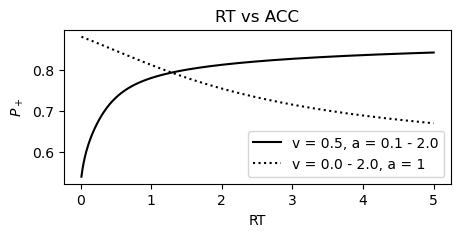

In [3]:
# plot mixture accuracies for varying a, v
fig, ax = plt.subplots(figsize=(5, 2))

# fix v, vary a
a_s, v = np.linspace(0.1, 2, 100), 0.5
mdfs_corr = mdf(rt, a_s, t0, v, z)
mdfs_err = mdf(-rt, a_s, t0, v, z)
acc = mdfs_corr / (mdfs_corr + mdfs_err)
ax.plot(rt, acc, color="k", label=f"v = {v}, a = {a_s[0]} - {a_s[-1]}")

# fix a, vary v
a, v_s = 1, np.linspace(0, 2, 100)
mdfs_corr = mdf(rt, a, t0, v_s, z)
mdfs_err = mdf(-rt, a, t0, v_s, z)
acc = mdfs_corr / (mdfs_corr + mdfs_err)
ax.plot(rt, acc, color="k", ls=":", label=f"v = {v_s[0]} - {v_s[-1]}, a = {a}")

ax.set_title("RT vs ACC")
ax.legend()
ax.set_xlabel("RT")
ax.set_ylabel(r"$P_+$")